In [1]:
import mglearn
from preamble import *
from sklearn.model_selection import train_test_split
import matplotlib

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(type(cancer),'\n')

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#cancer.data == cancer['data']
#stratify : y 클래스에 따라 비율을 조정해서 데이터 추출 (층화추출샘플링)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))  #피팅률 (훈련데이터에 대한 학습률)
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))  #어큐러시 

#튜닝? 
#1) 디퐅르 종료조건 : 마지막 노드의 불순도 0  
#2) depth 종료조건 설정가능 : 사전/사후 설정 가능한데, skit-learn 사전으로만 지원한다.

<class 'sklearn.utils.Bunch'> 

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [3]:
#튜닝? 
#1) 디퐅르 종료조건 : 마지막 노드의 불순도 0  
#2) depth 종료조건 설정가능 : 사전/사후 설정 가능한데, skit-learn 사전으로만 지원한다.

tree
'''
max_depth, max_features ~중요도에 따라 걸러진다. , max_leaf_nodes (리프노드 수 조절),
min_impurity_decrease (최소불순도 조절)  , min_samples_leaf : (리프노드 안 샘플 수 조절) 

'''

tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [33]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)  #impurity : 불순도
                                                    
#export_graphviz : 그래픽 정보를 .dot이라는 텍스트 정보로 저장시키는 역활을 해준다. 

In [35]:
#anaconda prompt에서 .dot 저장파일 읽어줄 모듈설치 

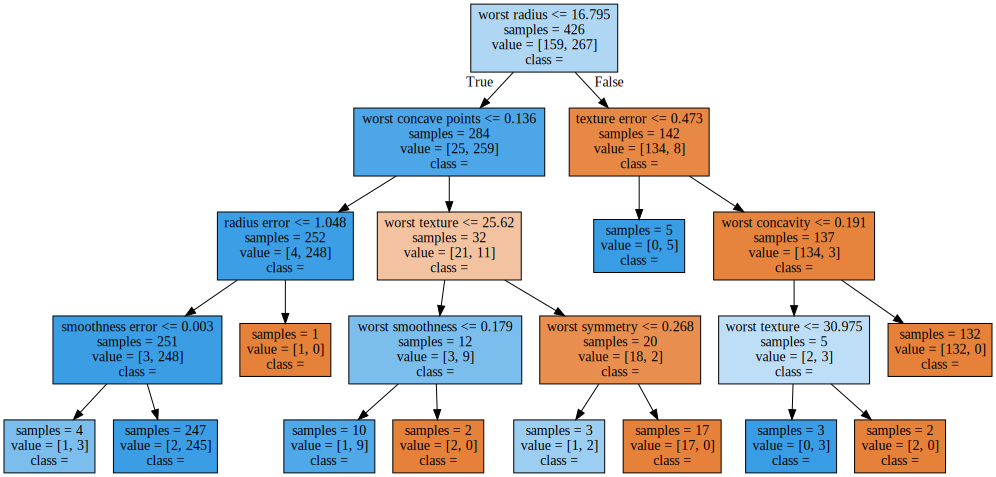

In [36]:
import graphviz

with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
#노드 값 확인
분기조건
총 샘플(행) 수
value_count[양성, 음성]
class = 'class_name'

In [41]:
cancer.feature_names  #30개 속성

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [42]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

fontname = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=fontname)

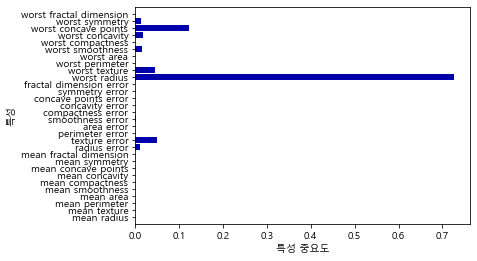

In [48]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    #barh : bar_horizon(x,y축,)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


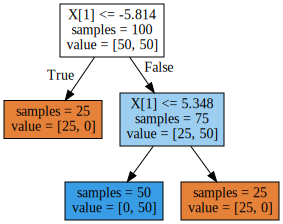

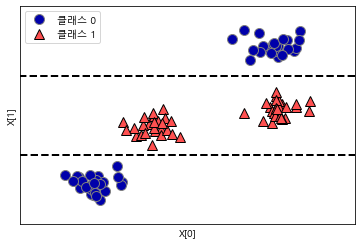

In [49]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

     Unnamed: 0     date     price
0             0  1957.00  4.11e+08
1             1  1959.00  6.79e+07
2             2  1960.00  5.24e+06
3             3  1965.00  2.64e+06
4             4  1970.00  7.34e+05
..          ...      ...       ...
328         328  2015.58  4.50e-03
329         329  2015.67  4.30e-03
330         330  2015.75  4.20e-03
331         331  2015.83  3.80e-03
332         332  2015.92  3.70e-03

[333 rows x 3 columns]


Text(0, 0.5, '가격 ($/Mbyte)')

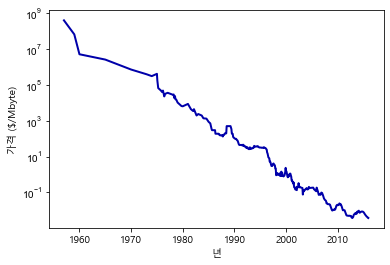

In [51]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
print(ram_prices)

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
#semilogy : y값에 log(ln)를 취해라!! _ 그때 그때 변동을 주시하기 보다는 전반적인 추세만 보려고 했기 때문

plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [59]:
from sklearn.tree import DecisionTreeRegressor  #회귀분석 트리!!!
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


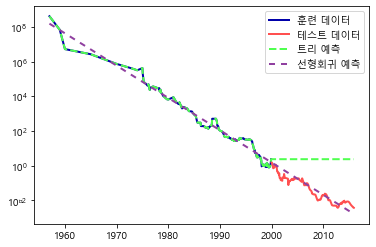

In [60]:
#plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

In [69]:
X_train = data_train.date[:, np.newaxis]
print(X_train)
X2_train = data_train.date[:]
X2_train
X3_train = np.array(data_train.date[:])
X3_train

#같은 배열에 대해 차원만 1차원 증가시키는 경우에는 newaxis 명령을 사용하기도 한다.

[[1957.  ]
 [1959.  ]
 [1960.  ]
 [1965.  ]
 [1970.  ]
 [1973.  ]
 [1974.  ]
 [1975.  ]
 [1975.08]
 [1975.25]
 [1975.75]
 [1976.  ]
 [1976.17]
 [1976.42]
 [1976.58]
 [1977.08]
 [1978.17]
 [1978.25]
 [1978.33]
 [1978.5 ]
 [1978.58]
 [1978.75]
 [1979.  ]
 [1979.75]
 [1980.  ]
 [1981.  ]
 [1981.58]
 [1982.  ]
 [1982.17]
 [1982.67]
 [1983.  ]
 [1983.67]
 [1984.  ]
 [1984.58]
 [1985.  ]
 [1985.33]
 [1985.42]
 [1985.5 ]
 [1985.58]
 [1985.67]
 [1985.83]
 [1985.92]
 [1986.  ]
 [1986.08]
 [1986.17]
 [1986.25]
 [1986.33]
 [1986.42]
 [1986.5 ]
 [1986.58]
 [1986.67]
 [1986.75]
 [1986.92]
 [1987.  ]
 [1987.08]
 [1987.17]
 [1987.25]
 [1987.33]
 [1987.42]
 [1987.5 ]
 [1987.58]
 [1987.67]
 [1987.75]
 [1987.83]
 [1987.92]
 [1988.  ]
 [1988.08]
 [1988.17]
 [1988.33]
 [1988.42]
 [1988.5 ]
 [1988.58]
 [1988.67]
 [1988.75]
 [1988.83]
 [1988.92]
 [1989.  ]
 [1989.08]
 [1989.17]
 [1989.25]
 [1989.42]
 [1989.5 ]
 [1989.58]
 [1989.67]
 [1989.75]
 [1989.83]
 [1989.92]
 [1990.  ]
 [1990.17]
 [1990.33]
 [1990.42]

array([1957.  , 1959.  , 1960.  , 1965.  , 1970.  , 1973.  , 1974.  ,
       1975.  , 1975.08, 1975.25, 1975.75, 1976.  , 1976.17, 1976.42,
       1976.58, 1977.08, 1978.17, 1978.25, 1978.33, 1978.5 , 1978.58,
       1978.75, 1979.  , 1979.75, 1980.  , 1981.  , 1981.58, 1982.  ,
       1982.17, 1982.67, 1983.  , 1983.67, 1984.  , 1984.58, 1985.  ,
       1985.33, 1985.42, 1985.5 , 1985.58, 1985.67, 1985.83, 1985.92,
       1986.  , 1986.08, 1986.17, 1986.25, 1986.33, 1986.42, 1986.5 ,
       1986.58, 1986.67, 1986.75, 1986.92, 1987.  , 1987.08, 1987.17,
       1987.25, 1987.33, 1987.42, 1987.5 , 1987.58, 1987.67, 1987.75,
       1987.83, 1987.92, 1988.  , 1988.08, 1988.17, 1988.33, 1988.42,
       1988.5 , 1988.58, 1988.67, 1988.75, 1988.83, 1988.92, 1989.  ,
       1989.08, 1989.17, 1989.25, 1989.42, 1989.5 , 1989.58, 1989.67,
       1989.75, 1989.83, 1989.92, 1990.  , 1990.17, 1990.33, 1990.42,
       1990.5 , 1990.58, 1990.67, 1990.75, 1990.83, 1990.92, 1991.  ,
       1991.08, 1991

# 랜덤포레스트
### : 앙상블 방법 중에서도 베깅 방식!!
##### 데이터 추출 : 부트스트랩

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) #noise : 25%정도의 벗어나는 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) #층화추출

forest = RandomForestClassifier(n_estimators=5, random_state=2) #n_estimators : 평가데이터 수(표본)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [94]:
print(X)
X.shape

[[ 1.878  0.568]
 [ 0.369 -0.349]
 [ 0.965  0.109]
 [ 0.486  0.203]
 [ 1.725  0.534]
 [ 1.48   0.087]
 [ 2.119  0.605]
 [-0.74   0.496]
 [-0.381  1.347]
 [ 0.229  0.88 ]
 [ 1.313 -0.697]
 [ 0.874  0.838]
 [ 0.771 -0.697]
 [ 1.263  0.129]
 [-0.72   0.691]
 [ 0.792 -0.405]
 [ 1.319 -0.414]
 [ 0.266  0.782]
 [ 0.087  0.494]
 [-0.749 -0.07 ]
 [ 0.884 -0.354]
 [ 1.027  0.733]
 [ 0.739  0.308]
 [ 1.129  0.332]
 [ 1.155 -0.506]
 [ 1.568 -0.059]
 [ 0.29   1.008]
 [ 0.641 -0.199]
 [-1.2    0.464]
 [-0.17   0.607]
 [-0.534  0.502]
 [ 1.005  0.387]
 [ 0.653  0.809]
 [-0.567  0.73 ]
 [ 1.719  0.329]
 [ 0.965  0.518]
 [ 0.268 -0.11 ]
 [ 1.509 -0.067]
 [-0.594  0.468]
 [-1.065  0.568]
 [ 0.55   1.166]
 [-0.339  1.17 ]
 [-0.517  0.745]
 [-0.463  0.863]
 [ 1.685  0.334]
 [ 1.533 -0.031]
 [ 1.223 -0.369]
 [ 0.915 -0.504]
 [ 0.56  -0.165]
 [-1.181  0.209]
 [-0.047 -0.016]
 [ 1.385 -0.476]
 [ 0.974 -0.086]
 [-0.029 -0.056]
 [ 0.62   0.752]
 [ 1.764 -0.126]
 [ 0.067 -0.339]
 [ 1.658  0.211]
 [ 0.292  0.40

(100, 2)

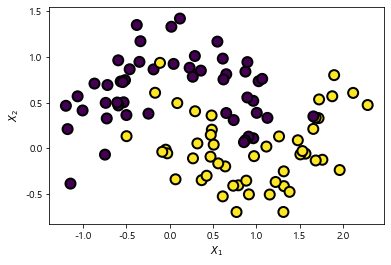

In [95]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [71]:
'''
criterion _ (기준) : 지니계수
n_estimators : 표본평가데이터 갯수
'''

'\ncriterion _ (기준) : 지니계수\nn_estimators : 표본평가데이터 갯수\n'

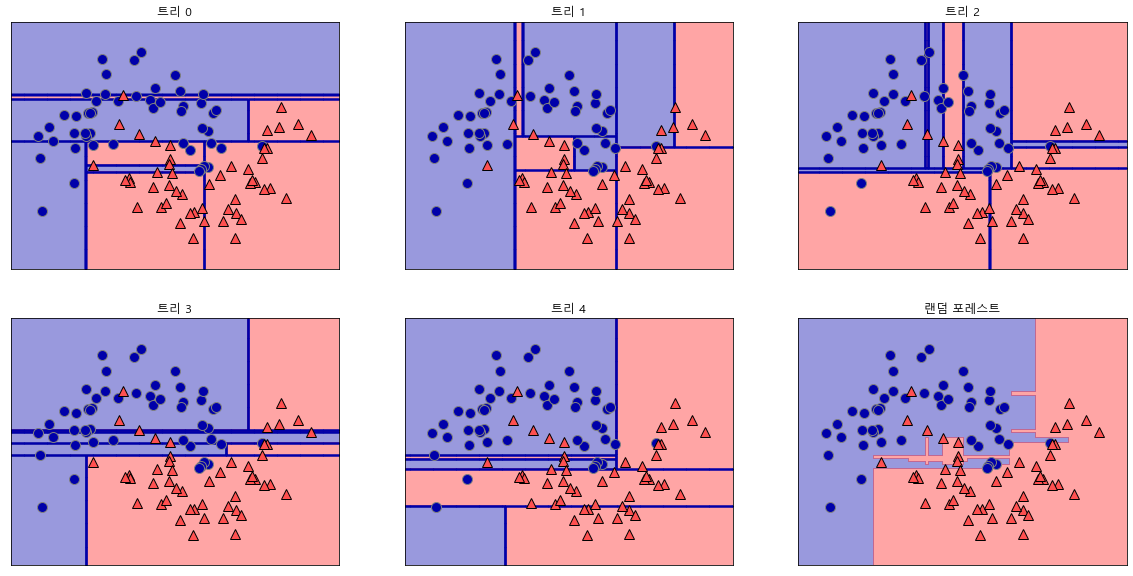

In [73]:

fig, axes = plt.subplots(2, 3, figsize=(20, 10)) #axes[0], axes[1], ... axes[5]

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):   
    #enumerate[튜플들의 리스트 : 앞~ 축정보(6개) , 뒤~ 표본트리(5개)]    :   '인덱스 / 값'으로 출력
    # 앞 축정보 2차원 ,  뒤 1차원  -> reshape의 반대 _ raval() : 1차원으로 늘어진다.
    # 모자른 것은 앞에 값으로 반복 
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [97]:
axes #0,1,2,3,4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BD49BC4C8>,
      dtype=object)

In [75]:
axes.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BD5B5B388>,
      dtype=object)

In [88]:
forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [86]:
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)) :
    #print(i)
    print(ax)
    #print(tree)
  

AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
AxesSubplot(0.125,0.125;0.227941x0.343182)
AxesSubplot(0.398529,0.125;0.227941x0.343182)


#### 평가표본 : 100개로 늘려본다. 디폴트

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


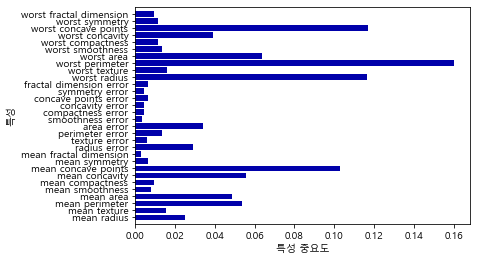

In [99]:
plot_feature_importances_cancer(forest)

## AdaBoost

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                           n_jobs=-1, random_state=42)

print(bagging)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [179]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm,ym, stratify=ym, random_state=42)

'''
stratify는 훈련/테스트 데이터들이 
원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정한다.
예를 들어 0,1의 클래스가 input dataset에 20:80 비율로 있었다면 
훈련 데이터와 테스트 데이터 역시 각각의 클래스가 같은 비율로 있도록 지정할 수 있다. '''

print(Xm_test)  #속성이 2개인 데이터
type(Xm_test)  #numpy.ndarray

[[ 1.317 -0.253]
 [ 1.155 -0.506]
 [ 1.313 -0.697]
 [ 0.873  0.086]
 [ 1.725  0.534]
 [-0.499  0.132]
 [ 0.359  0.849]
 [-0.17   0.607]
 [ 1.509 -0.067]
 [ 0.369 -0.349]
 [-0.728  0.326]
 [ 0.771 -0.697]
 [ 1.005  0.387]
 [-0.749 -0.07 ]
 [ 1.899  0.799]
 [-0.87   0.707]
 [ 1.129  0.332]
 [ 0.974 -0.086]
 [ 0.897  0.942]
 [-0.517  0.745]
 [-0.594  0.468]
 [-0.463  0.863]
 [ 0.55   1.166]
 [-0.607  0.5  ]
 [ 0.426 -0.301]]


numpy.ndarray

In [123]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Figure(1440x720)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BD9333E08>,
      dtype=object)

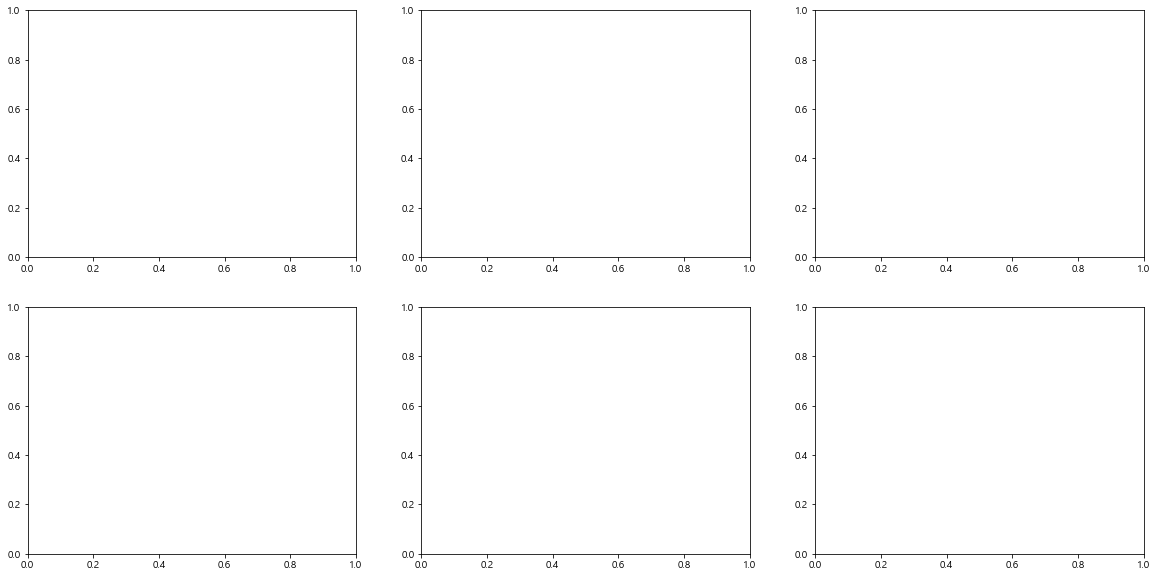

In [159]:
fig, axes= plt.subplots(2,3, figsize=(20,10))
print(axes[0][1])
print(fig)
axes

In [143]:
print(axes.ravel())  #1차원으로 차원축소
print(ada.estimators_) 

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1608637542, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1273642419, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=

In [ ]:
#zip(*iterable)은 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수이다.
#map(f, iterable)은 함수(f)와 반복 가능한(iterable) 자료형을 입력으로 받는다. map은 입력받은 자료형의 각 요소를 함수 f가 수행한 결과를 묶어서 돌려주는 함수이다.

0번째 AxesSubplot(0.125,0.536818;0.227941x0.343182)도화지
객체정보 : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1608637542, splitter='best')
1번째 AxesSubplot(0.398529,0.536818;0.227941x0.343182)도화지
객체정보 : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1273642419, splitter='best')
2번째 AxesSubplot(0.672059,0.536818;0.227941x0.343182)도화지
객체정보 

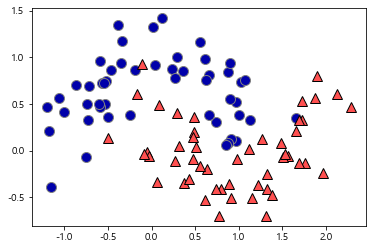

In [156]:
for i, (ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):  #갯수가 적은 것에 맞춰서 묶어준다.
    ax.set_title("트리 {}.format(i)")
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    print(f"{i}번째 {ax}도화지\n객체정보 : {tree}") 

#마지막(비어있는) 도화지에 ploting
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1], ym)
plt.show()


0번째 AxesSubplot(0.125,0.536818;0.227941x0.343182)도화지
객체정보 : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1608637542, splitter='best')
1번째 AxesSubplot(0.398529,0.536818;0.227941x0.343182)도화지
객체정보 : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1273642419, splitter='best')
2번째 AxesSubplot(0.672059,0.536818;0.227941x0.343182)도화지
객체정보 

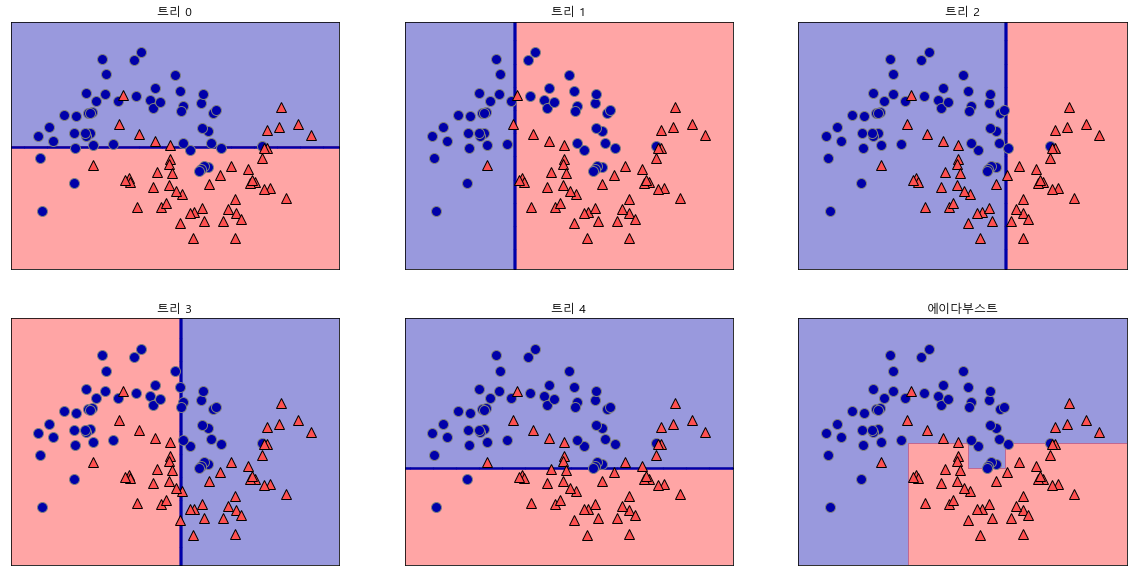

In [161]:
fig, axes= plt.subplots(2,3, figsize=(20,10))

for i, (ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):  #갯수가 적은 것에 맞춰서 묶어준다.
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    print(f"{i}번째 {ax}도화지\n객체정보 : {tree}") 

#마지막(비어있는) 도화지에 ploting
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1], ym)
plt.show()


In [162]:
'''층화 임의 추출
데이터가 중첩 없이 분할될 수 있는 경우_ (즉, 서로 교집합이 없는 집합들로 나뉠 수 있는 경우) 
그리고 각 분할의 성격이 명확히 다른 경우 
층화 임의 추출Stratified Random Sampling을 수행하여 더 정확한 분석 결과를 얻을 수 있다.

예를 들어, 남성 20%, 여성 80%로 구성된 집단이 있을 때 이 집단의 일부를 표본으로 뽑아 키를 측정한 뒤 전체 집단의 평균 키를 예상한다고 가정해보자. 성별에 따라 키의 차이가 존재할 것이므로, 성별을 고려하여 표본을 추출하는 것이 중요할 것이다. 그런데 단순 임의 추출을 이 데이터에 적용하게 되면 전체 데이터로부터 각 데이터를 같은 확률로 뽑는다. 그 결과 남성이 우연히 20%보다 많이 추출되거나 적게 추출될 수 있다. 이렇게 뽑힌 표본에서 평균 키를 계산하게 되면 평균 키가 집단의 실제 평균보다 우연히 작거나 크게 추정될 위험이 있다.
이 데이터의 경우 남성 데이터와 여성 데이터를 떼놓고 각각으로부터 표본을 추출함으로써 남성과 여성의 표본 비율을 20% : 80%로 유지할 수 있다. 이를 층화 임의 추출이라 하며 데이터를 남성, 여성으로 분할한 것을 ‘층’이라고 부른다.
층화 임의 추출을 하게 되면 뽑힌 남성의 표본을 사용해 남성 키의 평균을 추정할 수 있고, 여성 표본을 사용해 여성 키의 평균을 추정할 수 있다는 장점이 있다. 다시 말해 전체 평균뿐만 아니라 층별(성별) 평균 키의 추정이 가능해진다. 더 자세한 설명은 참고자료 [4]를 참고하기 바란다.'''
print('<층화추출 메모>')

<층화추출 메모>


In [178]:
cancer =load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

Xc_train.shape

(426, 30)

In [180]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [187]:
print("훈련 세트 정확도 : {:3.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


In [208]:
n_features = cancer.data.shape[1]
#head(cancer.data) 함수지향_R / Python 지원 안한다.
#cancer.data.head  #cancer객체(넘파이)에서는 head기능이 없다.  : 'numpy.ndarray' object has no attribute 'head'
cancer

{'data': array([[ 17.99 ,  10.38 , 122.8  , ...,   0.265,   0.46 ,   0.119],
        [ 20.57 ,  17.77 , 132.9  , ...,   0.186,   0.275,   0.089],
        [ 19.69 ,  21.25 , 130.   , ...,   0.243,   0.361,   0.088],
        ...,
        [ 16.6  ,  28.08 , 108.3  , ...,   0.142,   0.222,   0.078],
        [ 20.6  ,  29.33 , 140.1  , ...,   0.265,   0.409,   0.124],
        [  7.76 ,  24.54 ,  47.92 , ...,   0.   ,   0.287,   0.07 ]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 

In [213]:
n_features = cancer.data.shape[1]   #행 갯수 추출
ada.feature_importances_

array([0.  , 0.08, 0.  , 0.  , 0.07, 0.06, 0.03, 0.05, 0.01, 0.01, 0.  ,
       0.03, 0.01, 0.11, 0.01, 0.05, 0.01, 0.02, 0.04, 0.04, 0.01, 0.08,
       0.04, 0.04, 0.02, 0.01, 0.05, 0.04, 0.06, 0.02])

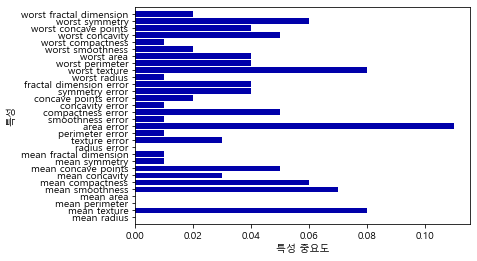

In [228]:
plt.barh(range(n_features), ada.feature_importances_ ,align ='center')
#align = 막대 x축정렬  https://kongdols-room.tistory.com/95

plt.yticks(np.arange(n_features), cancer.feature_names) 
#y축 설정 : 갯수, 이름 _ tick을 몇 개나, 또 어떤 label로 표현할지

#축 이름,범위
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)

plt.show()
